# Lab #2

First and Last Name: Muhammad Waseem

Student ID: 501038529



First 5 Rows of Dataset:


,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1



Percentage of Each Class (CHD 0 and 1):
chd
0    65.367965
1    34.632035
Name: proportion, dtype: float64


<ipython-input-23-87444aa188e0>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="chd", data=df, palette="coolwarm", hue=None, legend=False)


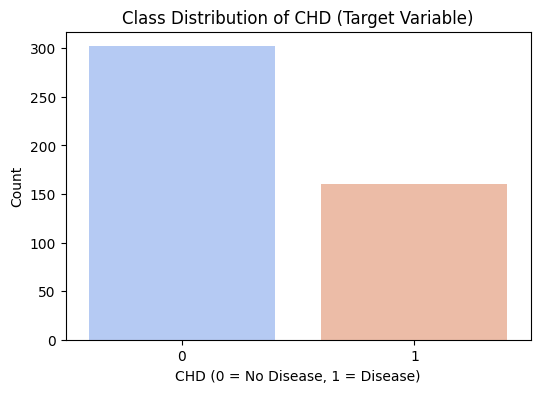


Missing Values Per Column:
sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

Number of Categorical Variables: 1
Categorical Features: ['famhist']


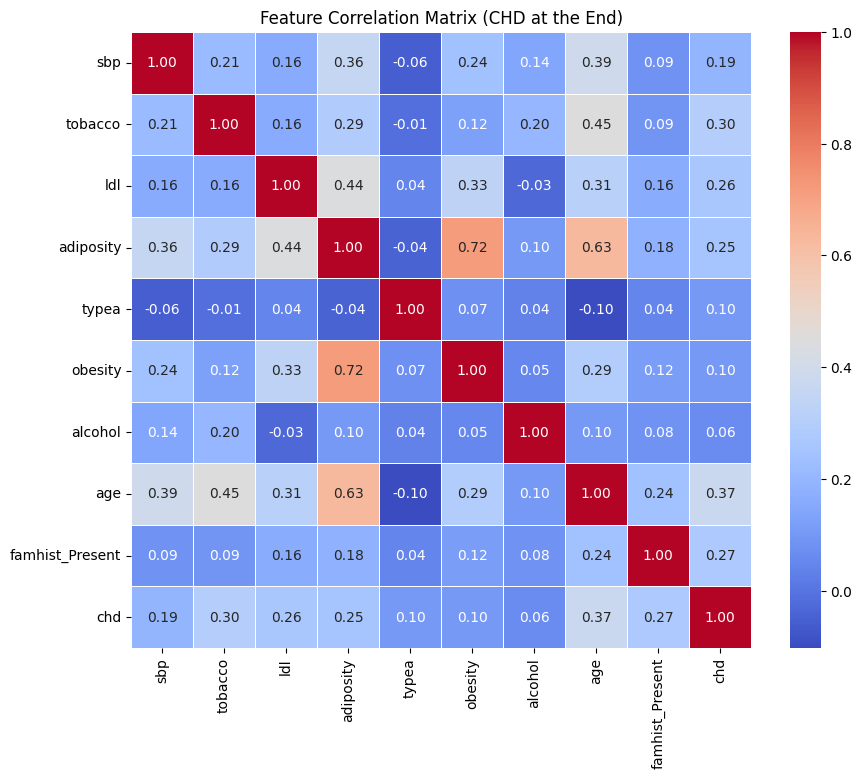


Top Features Correlated with CHD:
age                0.372973
tobacco            0.299718
famhist_Present    0.272373
ldl                0.263053
adiposity          0.254121
sbp                0.192354
typea              0.103156
obesity            0.100095
alcohol            0.062531
Name: chd, dtype: float64

Standardized Feature Sample:


,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,famhist_Present
0,1.058564,1.823073,0.478412,-0.295503,-0.418470,-0.176786,3.277738,0.629336,1.185854
1,0.277089,-0.790237,-0.159680,0.412140,0.193344,0.671373,-0.612745,1.383115,-0.843274
2,-0.992806,-0.774980,-0.609245,0.884332,-0.112563,0.735519,-0.541183,0.218184,1.185854
3,1.546985,0.842264,0.807126,1.624141,-0.214532,1.412621,0.295062,1.040488,1.185854
4,-0.211332,2.171805,-0.599577,0.305351,0.703189,-0.012856,1.647775,0.423760,1.185854


In [23]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load dataset
url = "https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv"
df = pd.read_csv(url)

# Drop 'row.names' since it's just an index
if 'row.names' in df.columns:
    df = df.drop(columns=['row.names'])

# EDA: Exploratory Data Analysis
# ----------------------------------
# Display first few rows
print("First 5 Rows of Dataset:")
display(df.head())

# Percentage of each class (CHD 0 and 1)
print("\nPercentage of Each Class (CHD 0 and 1):")
chd_counts = df["chd"].value_counts(normalize=True) * 100
print(chd_counts)

# Bar plot for CHD distribution
plt.figure(figsize=(6,4))
sns.countplot(x="chd", data=df, palette="coolwarm", hue=None, legend=False)
plt.title("Class Distribution of CHD (Target Variable)")
plt.xlabel("CHD (0 = No Disease, 1 = Disease)")
plt.ylabel("Count")
plt.show()

# Missing values per column
print("\nMissing Values Per Column:")
print(df.isnull().sum())

# Identify categorical variables
categorical_features = df.select_dtypes(include=['object']).columns
print("\nNumber of Categorical Variables:", len(categorical_features))
print("Categorical Features:", categorical_features.tolist())

# One-Hot Encoding (Convert categorical 'famhist' to binary)
df_encoded = pd.get_dummies(df, columns=['famhist'], drop_first=True)

# Move 'chd' to the last column to maintain order
cols = [col for col in df_encoded.columns if col != 'chd'] + ['chd']
df_encoded = df_encoded[cols]

# Compute & Fix Correlation Matrix (Include CHD at End)
correlation_matrix = df_encoded.corr()

# Move 'chd' to the last row & column in the correlation matrix
correlation_matrix = correlation_matrix.reindex(index=cols, columns=cols)

# Now, we keep CHD in the heatmap but place it at the end
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Matrix (CHD at the End)")
plt.show()

# Display top correlated features with CHD
correlation_with_target = correlation_matrix["chd"].drop("chd").abs().sort_values(ascending=False)
print("\nTop Features Correlated with CHD:")
print(correlation_with_target)

# Standardization: Normalize all numerical features
# -----------------------------------------------------
# Separate features and target variable
X = df_encoded.drop(columns=["chd"])  # Features (Exclude Target)
y = df_encoded["chd"]                 # Target Variable

# Standardize only the numerical features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Display standardized data
print("\nStandardized Feature Sample:")
display(X_scaled.head())


Batch Gradient Descent (α=0.001, Epochs=500):
  θ_0: 0.281897
  θ_1: 0.894844
  θ_2: 0.703882
  θ_3: 0.577677
  θ_4: 0.107648
  θ_5: 0.176685
  θ_6: 0.014887
  θ_7: 0.809192
  θ_8: 0.563451
  θ_9: 0.688677
--------------------------------------------------
Batch Gradient Descent (α=0.001, Epochs=1000):
  θ_0: 0.194373
  θ_1: 0.840993
  θ_2: 0.676911
  θ_3: 0.558531
  θ_4: 0.065589
  θ_5: 0.195447
  θ_6: -0.022743
  θ_7: 0.753013
  θ_8: 0.530198
  θ_9: 0.669522
--------------------------------------------------
Batch Gradient Descent (α=0.001, Epochs=10000):
  θ_0: -0.626960
  θ_1: 0.305003
  θ_2: 0.435659
  θ_3: 0.426779
  θ_4: -0.051276
  θ_5: 0.315623
  θ_6: -0.173186
  θ_7: 0.116864
  θ_8: 0.447198
  θ_9: 0.479570
--------------------------------------------------
Batch Gradient Descent (α=0.0001, Epochs=500):
  θ_0: 0.365049
  θ_1: 0.945046
  θ_2: 0.729137
  θ_3: 0.596480
  θ_4: 0.150898
  θ_5: 0.158149
  θ_6: 0.053513
  θ_7: 0.860450
  θ_8: 0.597154
  θ_9: 0.706128
---------------

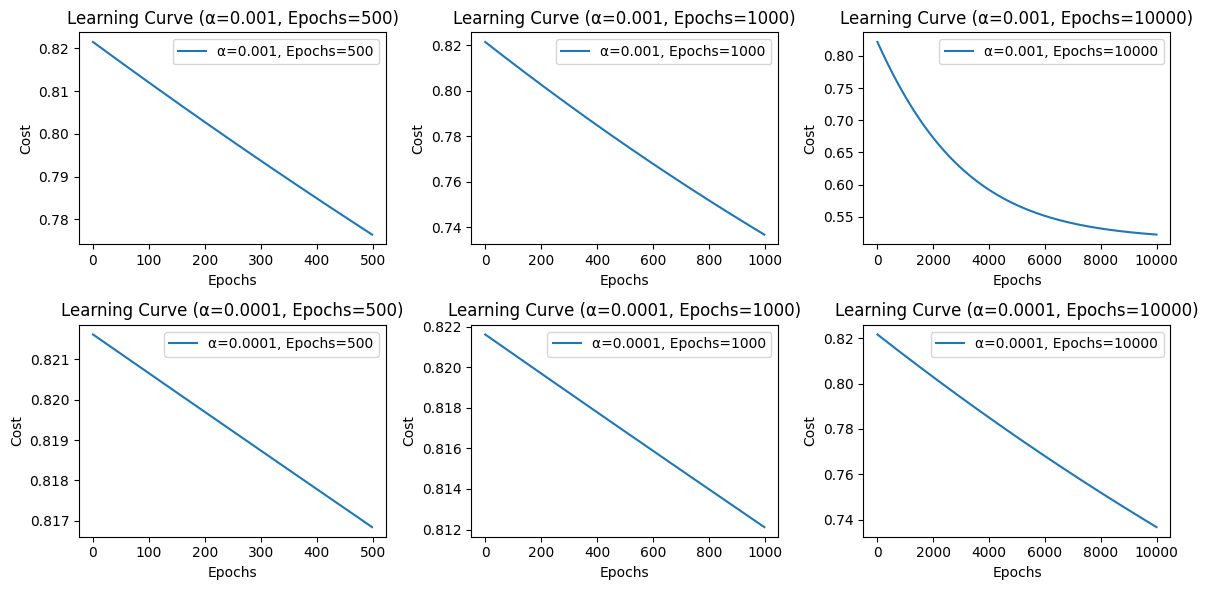

In [11]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load dataset
url = "https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv"
df = pd.read_csv(url)

# Drop 'row.names' since it's just an index
if 'row.names' in df.columns:
    df = df.drop(columns=['row.names'])

# One-Hot Encode categorical variables (famhist: Present=1, Absent=0)
df_encoded = pd.get_dummies(df, columns=['famhist'], drop_first=True)

# Move 'chd' to the last column to maintain order
cols = [col for col in df_encoded.columns if col != 'chd'] + ['chd']
df_encoded = df_encoded[cols]

# Standardization: Normalize all numerical features
X = df_encoded.drop(columns=["chd"])  # Features (Exclude Target)
y = df_encoded["chd"]                 # Target Variable

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Prepare Data for Training
# Add intercept term (bias) x0 = 1
X = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]  # Add bias term

# Fix: Remove `.values`, since y is already a NumPy array
y = y.to_numpy().reshape(-1, 1)  # Ensure y is a column vector

# Initialize theta (weights) randomly between 0 and 1
np.random.seed(42)
theta_initial = np.random.rand(X.shape[1], 1)

# Define the Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the Cost Function (Binary Cross-Entropy Loss)
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    cost = (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

# Implement Batch Gradient Descent
def gradient_descent(X, y, theta, alpha, epochs):
    m = len(y)
    cost_history = []

    for _ in range(epochs):
        h = sigmoid(np.dot(X, theta))
        gradient = (1 / m) * np.dot(X.T, (h - y))
        theta -= alpha * gradient  # Update theta
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)  # Store cost for learning curve

    return theta, cost_history  # Return final weights and cost history

# Train Logistic Regression Model with Different Learning Rates & Epochs
learning_rates = [0.001, 0.0001]
epochs_list = [500, 1000, 10000]

# Store final weights for each configuration
final_weights = {}

# Plot Learning Curves
plt.figure(figsize=(12, 6))

for i, alpha in enumerate(learning_rates):
    for j, epochs in enumerate(epochs_list):
        theta = np.copy(theta_initial)  # Reset theta for each run
        theta_final, cost_history = gradient_descent(X, y, theta, alpha, epochs)

        # Store final theta values
        final_weights[f"α={alpha}, Epochs={epochs}"] = theta.flatten()

        # Print final weight values for indices 0 to 9
        print(f"Batch Gradient Descent (α={alpha}, Epochs={epochs}):")
        for idx in range(min(10, theta_final.shape[0])):  # Only printing first 10 weights
            print(f"  θ_{idx}: {theta_final[idx, 0]:.6f}")
        print("-" * 50)

        # Plot cost vs. epochs
        plt.subplot(2, 3, i * 3 + j + 1)
        plt.plot(range(epochs), cost_history, label=f"α={alpha}, Epochs={epochs}")
        plt.xlabel("Epochs")
        plt.ylabel("Cost")
        plt.legend()
        plt.title(f"Learning Curve (α={alpha}, Epochs={epochs})")

plt.tight_layout()
plt.show()


For learning rate 0.001, the cost function finishes converging at approximately 10,000 epochs and we can stop training.

For learning rate 0.0001, the cost function does not finish converging after even 10,000 epochs, the training should not finish.

Mini-Batch Gradient Descent (α=0.001, Epochs=500):
  Weight 0: -0.3260
  Weight 1: 0.5026
  Weight 2: 0.5157
  Weight 3: 0.4630
  Weight 4: -0.0832
  Weight 5: 0.2820
  Weight 6: -0.1645
  Weight 7: 0.3669
  Weight 8: 0.4073
  Weight 9: 0.5458
--------------------------------------------------
Mini-Batch Gradient Descent (α=0.001, Epochs=1000):
  Weight 0: -0.6263
  Weight 1: 0.3037
  Weight 2: 0.4354
  Weight 3: 0.4268
  Weight 4: -0.0499
  Weight 5: 0.3143
  Weight 6: -0.1716
  Weight 7: 0.1160
  Weight 8: 0.4468
  Weight 9: 0.4769
--------------------------------------------------
Mini-Batch Gradient Descent (α=0.001, Epochs=10000):
  Weight 0: -0.8783
  Weight 1: 0.1328
  Weight 2: 0.3626
  Weight 3: 0.3602
  Weight 4: 0.1344
  Weight 5: 0.3870
  Weight 6: -0.2574
  Weight 7: 0.0044
  Weight 8: 0.6651
  Weight 9: 0.4572
--------------------------------------------------
Mini-Batch Gradient Descent (α=0.0001, Epochs=500):
  Weight 0: 0.2818
  Weight 1: 0.8946
  Weight 2: 0.7042
  We

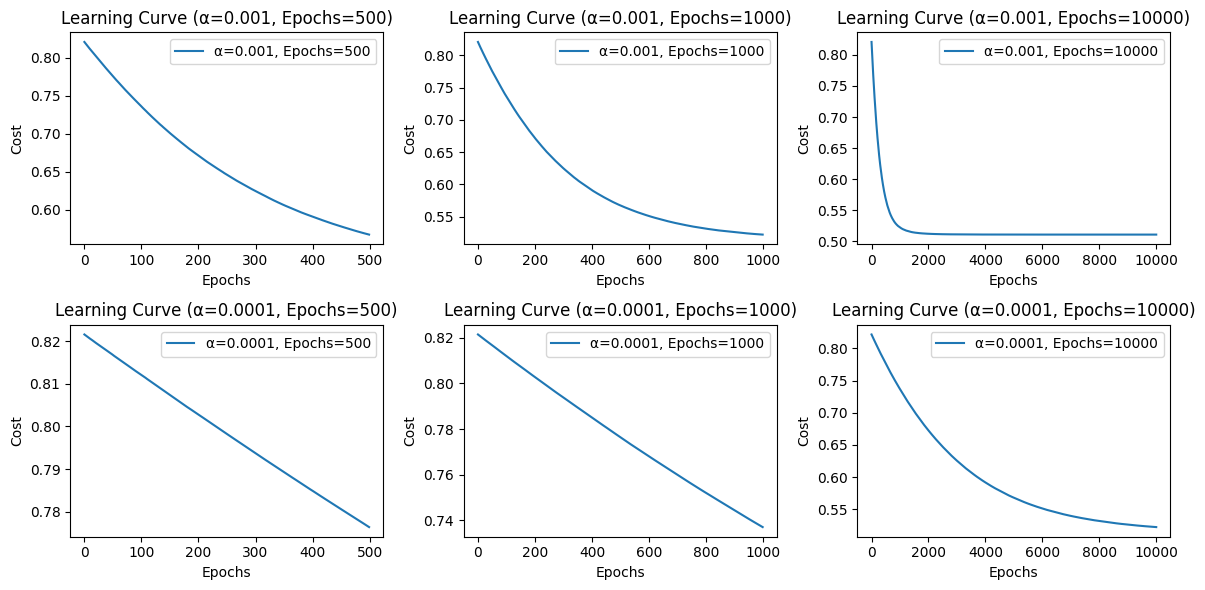

In [12]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load dataset
url = "https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv"
df = pd.read_csv(url)

# Drop 'row.names' since it's just an index
if 'row.names' in df.columns:
    df = df.drop(columns=['row.names'])

# One-Hot Encode categorical variables (famhist: Present=1, Absent=0)
df_encoded = pd.get_dummies(df, columns=['famhist'], drop_first=True)

# Move 'chd' to the last column to maintain order
cols = [col for col in df_encoded.columns if col != 'chd'] + ['chd']
df_encoded = df_encoded[cols]

# Standardization: Normalize all numerical features
X = df_encoded.drop(columns=["chd"])  # Features (Exclude Target)
y = df_encoded["chd"]                 # Target Variable

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Prepare Data for Training
# Add intercept term (bias) x0 = 1
X = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]  # Add bias term
y = y.values.reshape(-1, 1)  # Ensure y is a column vector

# Initialize theta (weights) randomly between 0 and 1
np.random.seed(42)
theta_initial = np.random.rand(X.shape[1], 1)

# Define the Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the Cost Function (Binary Cross-Entropy Loss)
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    cost = (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

# Implement Mini-Batch Gradient Descent
def mini_batch_gradient_descent(X, y, theta, alpha, epochs, batch_size=50):
    m = len(y)
    cost_history = []

    for epoch in range(epochs):
        # Shuffle data at the start of each epoch
        indices = np.random.permutation(m)
        X_shuffled, y_shuffled = X[indices], y[indices]

        # Process mini-batches
        for i in range(0, m, batch_size):
            X_mini = X_shuffled[i:i+batch_size]
            y_mini = y_shuffled[i:i+batch_size]

            h = sigmoid(np.dot(X_mini, theta))
            gradient = (1 / len(y_mini)) * np.dot(X_mini.T, (h - y_mini))
            theta -= alpha * gradient  # Update theta

        # Compute cost after each epoch
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

    return theta, cost_history

# Train Logistic Regression Model with Different Learning Rates & Epochs
learning_rates = [0.001, 0.0001]
epochs_list = [500, 1000, 10000]
batch_size = 50

# Plot Learning Curves
plt.figure(figsize=(12, 6))

for i, alpha in enumerate(learning_rates):
    for j, epochs in enumerate(epochs_list):
        theta = np.copy(theta_initial)  # Reset theta for each run
        theta_final, cost_history = mini_batch_gradient_descent(X, y, theta, alpha, epochs, batch_size)

        # Print final weight values for indices 0 to 9
        print(f"Mini-Batch Gradient Descent (α={alpha}, Epochs={epochs}):")
        for idx in range(theta_final.shape[0]):
            print(f"  Weight {idx}: {theta_final[idx, 0]:.4f}")
        print("-" * 50)

        # Plot cost vs. epochs
        plt.subplot(2, 3, i * 3 + j + 1)
        plt.plot(range(epochs), cost_history, label=f"α={alpha}, Epochs={epochs}")
        plt.xlabel("Epochs")
        plt.ylabel("Cost")
        plt.legend()
        plt.title(f"Learning Curve (α={alpha}, Epochs={epochs})")

plt.tight_layout()
plt.show()


For learning rate 0.001, the cost function finishes converging at approximately 2,000 epochs and we can stop training.

For the learning rate 0.0001, the cost function finishes converging at approximately 10,000 epochs and we can stop training.

In [9]:
# Import required libraries
from sklearn.linear_model import LogisticRegression

# Train LogisticRegression Model (Using Scikit-Learn)
log_reg = LogisticRegression(max_iter=10000, solver='lbfgs')  # Using high max_iter for better convergence
log_reg.fit(X_scaled, y.ravel())  # Train on standardized features

# Retrieve Scikit-Learn's Coefficients (θ₀ to θ₉)
theta_sklearn = np.concatenate(([log_reg.intercept_[0]], log_reg.coef_.flatten()))  # Include bias term

# Print Scikit-Learn's Final Coefficients
print("\nScikit-Learn LogisticRegression Coefficients (θ₀ to θ₉):")
for idx in range(10):  # Print first 10 coefficients
    print(f"  θ_{idx}: {theta_sklearn[idx]:.6f}")

# Compare with Our Batch & Mini-Batch Gradient Descent Weights
print("\nComparison with Batch Gradient Descent:")
for key, weights in final_weights.items():  # final_weights is from batch gradient descent
    print(f"{key}:")
    for idx in range(10):
        print(f"  θ_{idx}: {weights[idx]:.6f}")
    print("-" * 50)




Scikit-Learn LogisticRegression Coefficients (θ₀ to θ₉):
  θ_0: -0.872744
  θ_1: 0.133063
  θ_2: 0.361723
  θ_3: 0.355094
  θ_4: 0.141358
  θ_5: 0.379451
  θ_6: -0.254950
  θ_7: 0.003350
  θ_8: 0.647887
  θ_9: 0.450557

Comparison with Batch Gradient Descent:
α=0.001, Epochs=500:
  θ_0: 0.281897
  θ_1: 0.894844
  θ_2: 0.703882
  θ_3: 0.577677
  θ_4: 0.107648
  θ_5: 0.176685
  θ_6: 0.014887
  θ_7: 0.809192
  θ_8: 0.563451
  θ_9: 0.688677
--------------------------------------------------
α=0.001, Epochs=1000:
  θ_0: 0.194373
  θ_1: 0.840993
  θ_2: 0.676911
  θ_3: 0.558531
  θ_4: 0.065589
  θ_5: 0.195447
  θ_6: -0.022743
  θ_7: 0.753013
  θ_8: 0.530198
  θ_9: 0.669522
--------------------------------------------------
α=0.001, Epochs=10000:
  θ_0: -0.626960
  θ_1: 0.305003
  θ_2: 0.435659
  θ_3: 0.426779
  θ_4: -0.051276
  θ_5: 0.315623
  θ_6: -0.173186
  θ_7: 0.116864
  θ_8: 0.447198
  θ_9: 0.479570
--------------------------------------------------
α=0.0001, Epochs=500:
  θ_0: 0.36504